#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2022**

#Trabajo práctico entregable Exploración de Datos
**GRUPO 17**

**Balbuena, Florencia**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

El objetivo de este trabajo práctico es, a partir del set de datos utilizado, poder predecir si una persona será teletransportada en el viaje o no. 

##Carga de Datos

In [516]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [517]:
# Damos acceso al Drive para importar los archivos con los que vamos a trabajar
from google.colab import drive
import pandas as pd
from google.colab import files 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [518]:
SHARED_FOLDER_ALIAS = 'diplo'
DATASETS_PATH = '/content/drive/MyDrive/' + SHARED_FOLDER_ALIAS + '/AA/AprendizajeSupervisado-master/Práctico/'

In [519]:
# Datos de entrenamiento
path = DATASETS_PATH + 'train.csv'
train_dataset = pd.read_csv (path, comment="#")

train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [520]:
# Datos de Testeo
path = DATASETS_PATH + 'test.csv'
test_dataset = pd.read_csv (path, comment="#")

test_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [521]:
train_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


In [522]:
# Datos de validacion
path = DATASETS_PATH + 'test.csv'
test_dataset = pd.read_csv (path, comment="#")

test_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [523]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   870 non-null    int64  
 1   HomePlanet    848 non-null    object 
 2   CryoSleep     849 non-null    object 
 3   Cabin         855 non-null    object 
 4   Destination   848 non-null    object 
 5   Age           853 non-null    float64
 6   VIP           851 non-null    object 
 7   RoomService   843 non-null    float64
 8   FoodCourt     842 non-null    float64
 9   ShoppingMall  850 non-null    float64
 10  Spa           845 non-null    float64
 11  VRDeck        851 non-null    float64
 12  Name          854 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 88.5+ KB


Los sets de datos tienen 13 columnas además de la variable objetivo: Transported. Esta última puede poseer el valor de 0 o 1 dependiendo de si el viajero en cuestión fue teletransportado (valor 1) o si no lo hizo (valor 0).

El dataset de entrenamiento posee 7823 observaciones no nulas mientras que el dataset de validación tiene 870 observaciones (que corresponde al 10% de los datos totales)


In [524]:
train_dataset.Transported.value_counts()

1    3964
0    3859
Name: Transported, dtype: int64

El dataset se encuentra balanceado

##Visualizacion de Datos de manera general

Porcentaje de teletransportados:  50.67109804422856 %


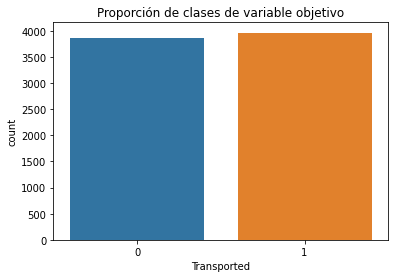

In [525]:
sns.countplot(data=train_dataset, x="Transported") 
print("Porcentaje de teletransportados: ", train_dataset.Transported.sum()/train_dataset.Transported.count()*100, "%")
plt.title('Proporción de clases de variable objetivo')
plt.show()

En el conjunto de train, el 50% de los viajeros fueron teletransportados.

Las variables son: 

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [526]:
variables_categóricas=["HomePlanet", "CryoSleep","Cabin", "Destination", "VIP", "Name"]
variables_numéricas=["PassengerId","Age","RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]   #Customer es solo un id, con lo cual no va a ser relevante para el análisis
target=["Transported"]

###Analisis de variables independientemente

In [527]:
train_dataset[variables_categóricas]

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,Europa,False,C/123/P,TRAPPIST-1e,False,Azhah Tronsive
1,Mars,True,F/126/S,NaN,False,Roswal Sha
2,Europa,True,B/343/S,TRAPPIST-1e,NaN,Shaiam Tinganking
3,Earth,False,F/1420/P,TRAPPIST-1e,False,Landa Grifford
4,Earth,False,G/9/P,TRAPPIST-1e,False,Gracy Dunnisey
...,...,...,...,...,...,...
7818,Mars,False,F/1319/S,TRAPPIST-1e,NaN,Risps Hacle
7819,Earth,False,G/459/S,TRAPPIST-1e,False,Gabrie Reenez
7820,Mars,True,F/1772/P,TRAPPIST-1e,False,Panzel Ruity
7821,Earth,False,E/253/P,TRAPPIST-1e,False,Belly Weavesend



 HomePlanet


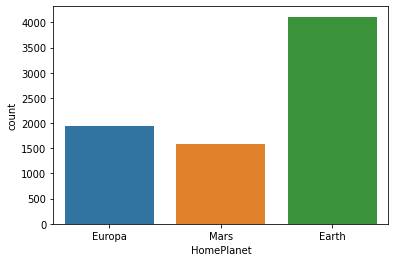


 CryoSleep


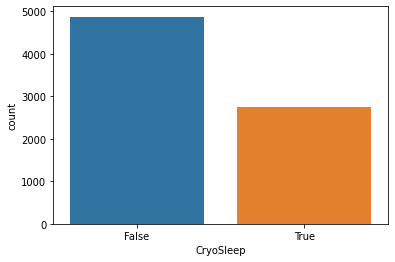


 Cabin


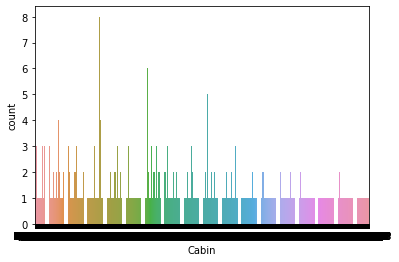


 Destination


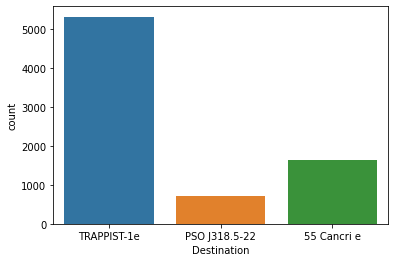


 VIP


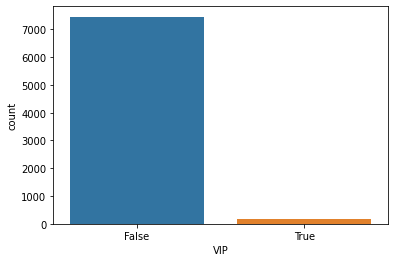


 Name


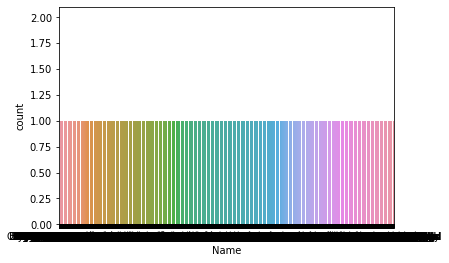

In [528]:
for j in variables_categóricas:
  print("\n", j)
  sns.countplot(x = train_dataset[j])
  plt.show()


 PassengerId


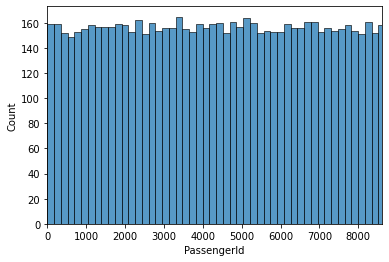


 Age


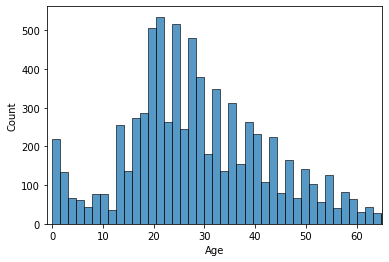


 RoomService


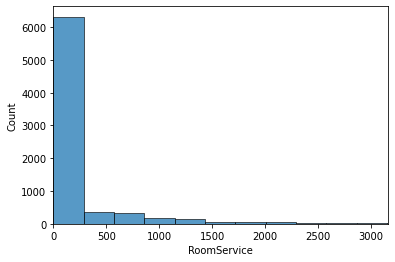


 FoodCourt


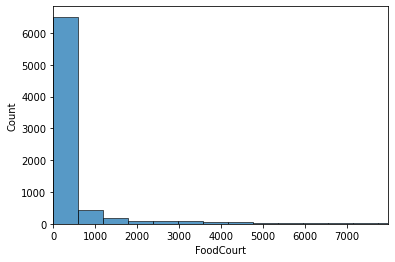


 ShoppingMall


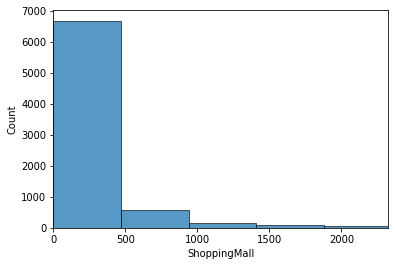


 Spa


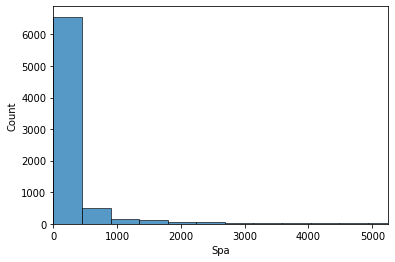


 VRDeck


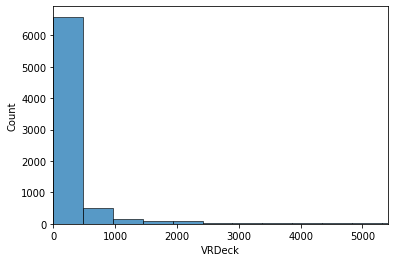

In [529]:
for i in variables_numéricas:
  print("\n", i)
  sns.histplot(train_dataset[i], bins = 50)
  plt.xlim(train_dataset[i].min()-1, np.nanquantile(train_dataset[i],0.99))
  plt.show()

Las visualizaciones anteriores muestran cómo están representadas cada variable en el dataset de entrenamiento. De aquí podemos que concluir que variables como PassengerID, Name y Cabin no serán de mucha utilidad a la hora de predecir si habrá o no transportación.

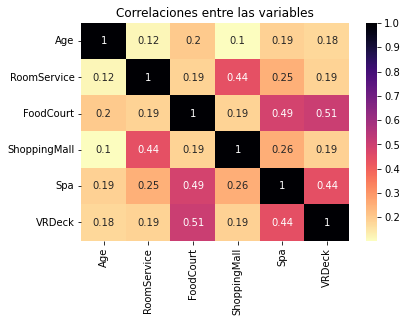

In [530]:
#Heat map para correlaciones, aunque no se trata de la mejor medida por el tipo de variables.
sns.heatmap(train_dataset[["Age","RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].corr("spearman"),annot=True,cmap='magma_r')
plt.title("Correlaciones entre las variables")
plt.show()

Segun lo expuesto en la matriz, pareciera que la correlación alta se da en las variables relacionadas a gastos extra: Room Service, ShoppingMall, FoodCourt, Spa y VRDeck

##Distribucion de las variables segun la variable objetivo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


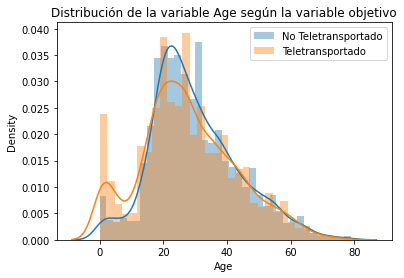

In [531]:
sns.distplot(train_dataset[train_dataset.Transported==0].Age, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].Age, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable Age según la variable objetivo")
plt.show()

A simple vista, pareciera que la variable Age tiene una leve influencia en la decisión de la teletransportación sobretodo en los primeros años de vida. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


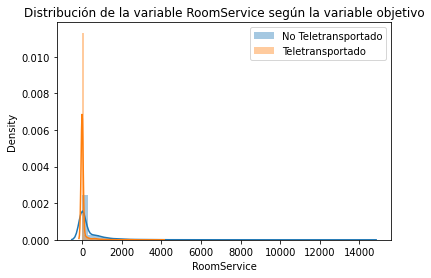

In [532]:
sns.distplot(train_dataset[train_dataset.Transported==0].RoomService, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].RoomService, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable RoomService según la variable objetivo")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


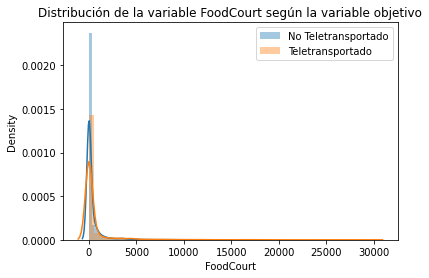

In [533]:
sns.distplot(train_dataset[train_dataset.Transported==0].FoodCourt, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].FoodCourt, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable FoodCourt según la variable objetivo")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


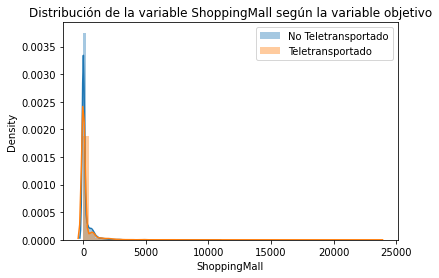

In [534]:
sns.distplot(train_dataset[train_dataset.Transported==0].ShoppingMall, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].ShoppingMall, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable ShoppingMall según la variable objetivo")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


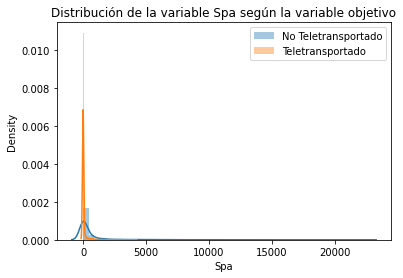

In [535]:
sns.distplot(train_dataset[train_dataset.Transported==0].Spa, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].Spa, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable Spa según la variable objetivo")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


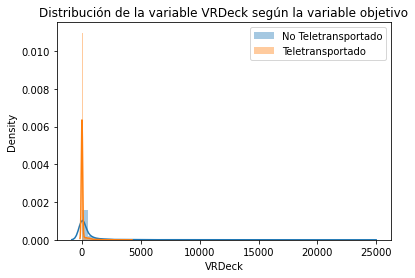

In [536]:
sns.distplot(train_dataset[train_dataset.Transported==0].VRDeck, label='No Teletransportado')
sns.distplot(train_dataset[train_dataset.Transported==1].VRDeck, label='Teletransportado')
plt.legend()
plt.title("Distribución de la variable VRDeck según la variable objetivo")
plt.show()

A simple vista, aquí se puede ver que la mayoría de las personas no tuvo gastos de Room Service, FoodCourt, ShoppingMall, Spa o VRDeck, por lo que, a priori, no serviría como buen estimador de teletransportación.. 

In [537]:
variables_categóricas=["HomePlanet", "CryoSleep","Cabin", "Destination", "VIP", "Name"]

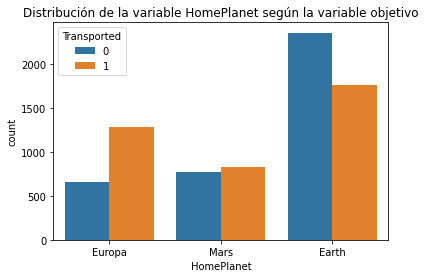

In [538]:
sns.countplot(data=train_dataset, x="HomePlanet", hue="Transported")
plt.title("Distribución de la variable HomePlanet según la variable objetivo")
plt.show()

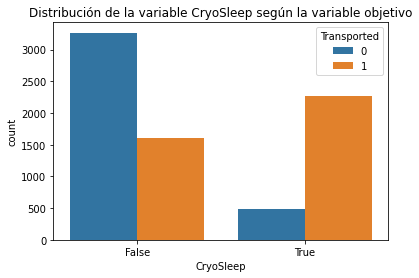

In [539]:
sns.countplot(data=train_dataset, x="CryoSleep", hue="Transported")
plt.title("Distribución de la variable CryoSleep según la variable objetivo")
plt.show()

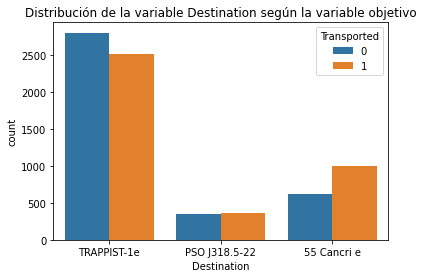

In [540]:
sns.countplot(data=train_dataset, x="Destination", hue="Transported")
plt.title("Distribución de la variable Destination según la variable objetivo")
plt.show()

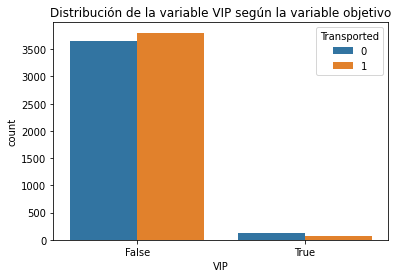

In [541]:
sns.countplot(data=train_dataset, x="VIP", hue="Transported")
plt.title("Distribución de la variable VIP según la variable objetivo")
plt.show()

Segun lo mostrado, pareciera haber variables que no aportan mucho a la diferenciación entre transportados y no transportados. Sin embargo, otras como CryoSleep parecieran tener comportamientos diferentes según el valor de la variable objetivo. 

###Calculo de Chi Cuadrado

In [542]:
family=pd.crosstab(train_dataset.Transported,train_dataset['CryoSleep'], normalize='index')
chi2, p, dof, ex=stats.chi2_contingency(family)
print("Chi2", chi2)
print("p-value=", p)
print("grados de libertad=", dof)
print("frecuencias esperadas=", ex)

Chi2 0.0
p-value= 1.0
grados de libertad= 1
frecuencias esperadas= [[0.6418374 0.3581626]
 [0.6418374 0.3581626]]


El p-valor obtenido para el test de indepedencia es significativo (p<0.05), por lo cual podemos concluir que hay una alta relación entre ambas variables: cryosleep y transported.

_____________

##Conclusion


Luego de un primer análisis exploratorio, podríamos identificar algunos insigths respecto del vínculo de los atributos y la variables objetivo:

Las variables que más se correlacionan con la variable objetivo "Transported" son HomePlanet y CryoSleep, ambas variables categóricas.
Por otro lado, la edad podría ser otro factor relevante ya que pareciera que hay más niños transportados que no transportados.

Cabe mencionar que, de todos modos, el análisis aquí presentado corresponde únicamente al grupo de observaciones incluídas en el conjunto de train. Si bien se espera que sea representativo de todos los datos, el vínculo entre las variables podría diferir en algunos puntos.

#Aprendizaje Supervisado

In [543]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import sklearn.linear_model ##SVM
import sklearn.neural_network ##SVM
from sklearn import neural_network
from sklearn import ensemble ##Random Forest
import xgboost as xgb ##Boosting
import missingno as msno

# Curación y Limpieza de outliers


In [544]:
# calcula los outliers en base a un quantil maximo y los descarta junto con los valores nulos y na
def removed_outliers_max(dataset, column, quantile,  show=False):
    value = dataset[column].quantile(quantile)

    print(f"Columna {column}:")
    mask_outlier = (dataset[column] <= (value))
    print(f"Máximo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(dataset[column])) | (pd.isna(dataset[column]))
    result = dataset[mask_outlier]
    
    print(f"\tFueron eliminados {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      sns.boxenplot(x=dataset[column], ax=axes[0]).set_title("Original")
      sns.boxenplot(x=result[column], ax=axes[1]).set_title(f"Descartando valores mayores al quantil {quantile}")

    return result

In [545]:
# calcula los outliers en base a un quantil minimo y los descarta junto con los valores nulos y na
def removed_outliers_min(dataset, column, quantile,  show=False):
    value = dataset[column].quantile(quantile)

    print(f"Columna {column}:")
    mask_outlier = (dataset[column] >= (value))
    print(f"Mínimo:{value}")
    mask_outlier = (mask_outlier) | (pd.isnull(dataset[column])) | (pd.isna(dataset[column]))
    result = dataset[mask_outlier]
    
    print(f"\tFueron eliminados {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      sns.boxenplot(x=dataset[column], ax=axes[0]).set_title("Original")
      sns.boxenplot(x=result[column], ax=axes[1]).set_title(f"Descartando valores menores al quantil {quantile}")

    return result

In [546]:
# Devuelve un dataset removiendo las columnas outliers usando IQR
def removed_outliers(dataset, column, upper=True, lower=True,  show=False, keep_nulls=True):

    # IQR
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1  

    print(f"Columna {column}:")
    if upper and lower:
      mask_outlier = (dataset[column] <= (Q3+1.5*IQR)) & (dataset[column] >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}, Maximo:{Q3+1.5*IQR}")
    elif lower:
      mask_outlier = (dataset[column] >= (Q1-1.5*IQR))
      print(f"\tMinimo: {Q1-1.5*IQR}")
    elif upper:
      mask_outlier = (dataset[column] <= (Q3+1.5*IQR))
      print(f"\tMaximo:{Q3+1.5*IQR}")
    else:
      raise ValueError
    if keep_nulls:
      mask_outlier = (mask_outlier) | (pd.isnull(dataset[column])) | (pd.isna(dataset[column]))
    result = dataset[mask_outlier]
    
    print(f"\tFueron eliminados {len(dataset)-len(result)} registros de {len(dataset)}")
    if show:
      fig, axes = plt.subplots(1, 2, figsize=(18, 3)) 
      sns.boxenplot(x=dataset[column], ax=axes[0]).set_title("Original")
      sns.boxenplot(x=result[column], ax=axes[1]).set_title("Descartando valores extremos segun IQR")

    return result

Columna RoomService:
Máximo:3161.7599999999875
	Fueron eliminados 77 registros de 7823


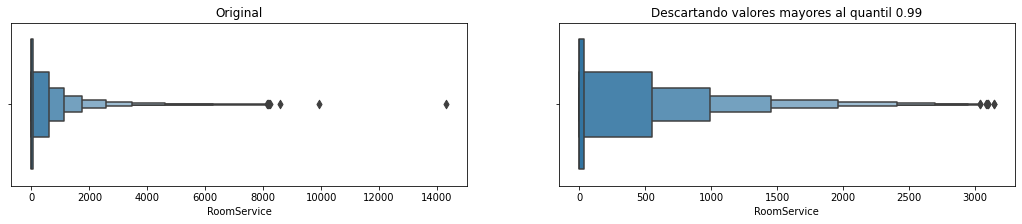

In [547]:
train_dataset_clean = removed_outliers_max(train_dataset, "RoomService", 0.99,  show=True)

Columna Age:
Máximo:65.0
	Fueron eliminados 73 registros de 7823


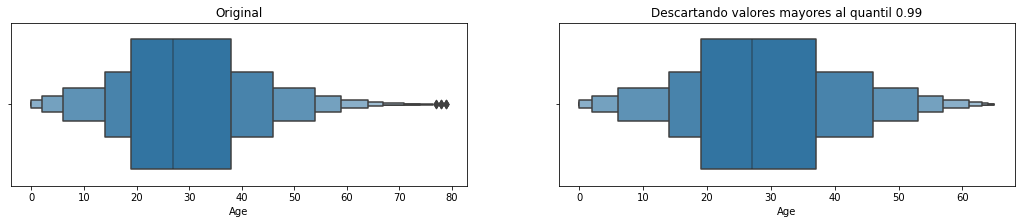

In [548]:
train_dataset_clean = removed_outliers_max(train_dataset, "Age", 0.99,  show=True)

Columna FoodCourt:
Máximo:7993.32
	Fueron eliminados 77 registros de 7823


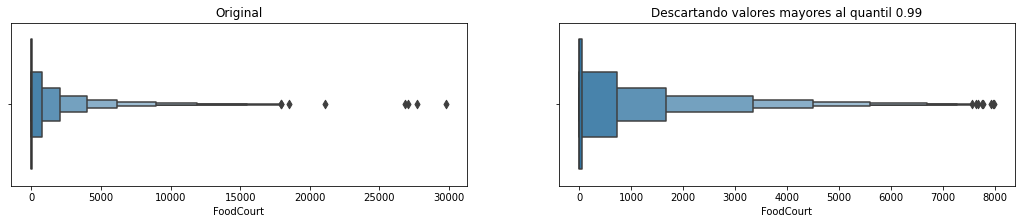

In [549]:
train_dataset_clean = removed_outliers_max(train_dataset, "FoodCourt", 0.99,  show=True)

Columna ShoppingMall:
Máximo:2325.239999999998
	Fueron eliminados 77 registros de 7823


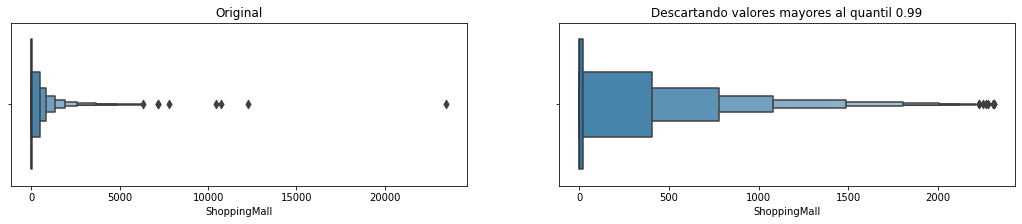

In [550]:
train_dataset_clean = removed_outliers_max(train_dataset, "ShoppingMall", 0.99,  show=True)

Columna Spa:
Máximo:5248.719999999999
	Fueron eliminados 77 registros de 7823


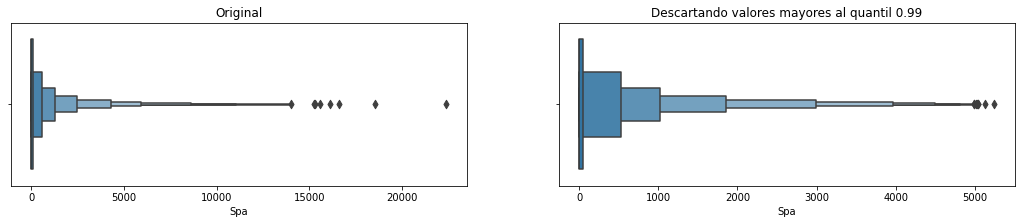

In [551]:
train_dataset_clean = removed_outliers_max(train_dataset, "Spa", 0.99,  show=True)

Columna VRDeck:
Máximo:5415.5200000000295
	Fueron eliminados 77 registros de 7823


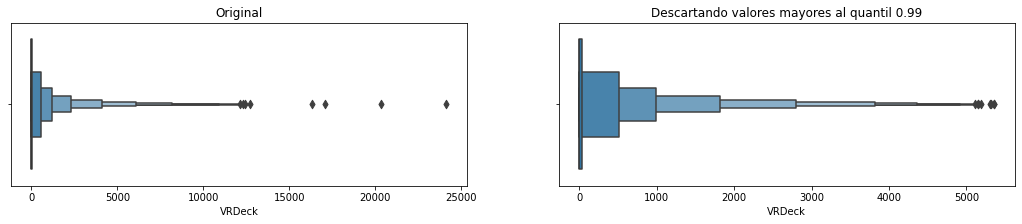

In [552]:
train_dataset_clean = removed_outliers_max(train_dataset, "VRDeck", 0.99,  show=True)

In [553]:
train_dataset_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [554]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


Una vez aplicada la limpieza podemos observar que de un total de 7823 registros, quedaron 7746

---



# Curación de variables Categóricas

In [555]:
train_dataset_clean.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [556]:
# divimos la variable Cabin en Cabin_deck, Cabin_num, Cabin_side
train_dataset_clean[['Cabin_deck','Cabin_num','Cabin_side']] = train_dataset_clean.Cabin.str.split('/',expand=True)
train_dataset_clean.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin_deck', 'Cabin_num', 'Cabin_side'],
      dtype='object')

In [557]:
# divimos la variable Cabin en first_name y last_name
train_dataset_clean[['first_name','last_name']]=train_dataset_clean.Name.str.split(' ',expand=True)

In [558]:
# eliminamos las columnas innecesarias luego de haberse separado
df_train_clean = train_dataset_clean.copy()
df_train_clean.drop('Cabin', inplace=True, axis=1)
df_train_clean.drop('Name', inplace=True, axis=1)
df_train_clean

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P,Azhah,Tronsive
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S,Roswal,Sha
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S,Shaiam,Tinganking
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P,Landa,Grifford
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,F,1319,S,Risps,Hacle
7819,2693,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0,G,459,S,Gabrie,Reenez
7820,8076,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1,F,1772,P,Panzel,Ruity
7821,3829,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0,E,253,P,Belly,Weavesend


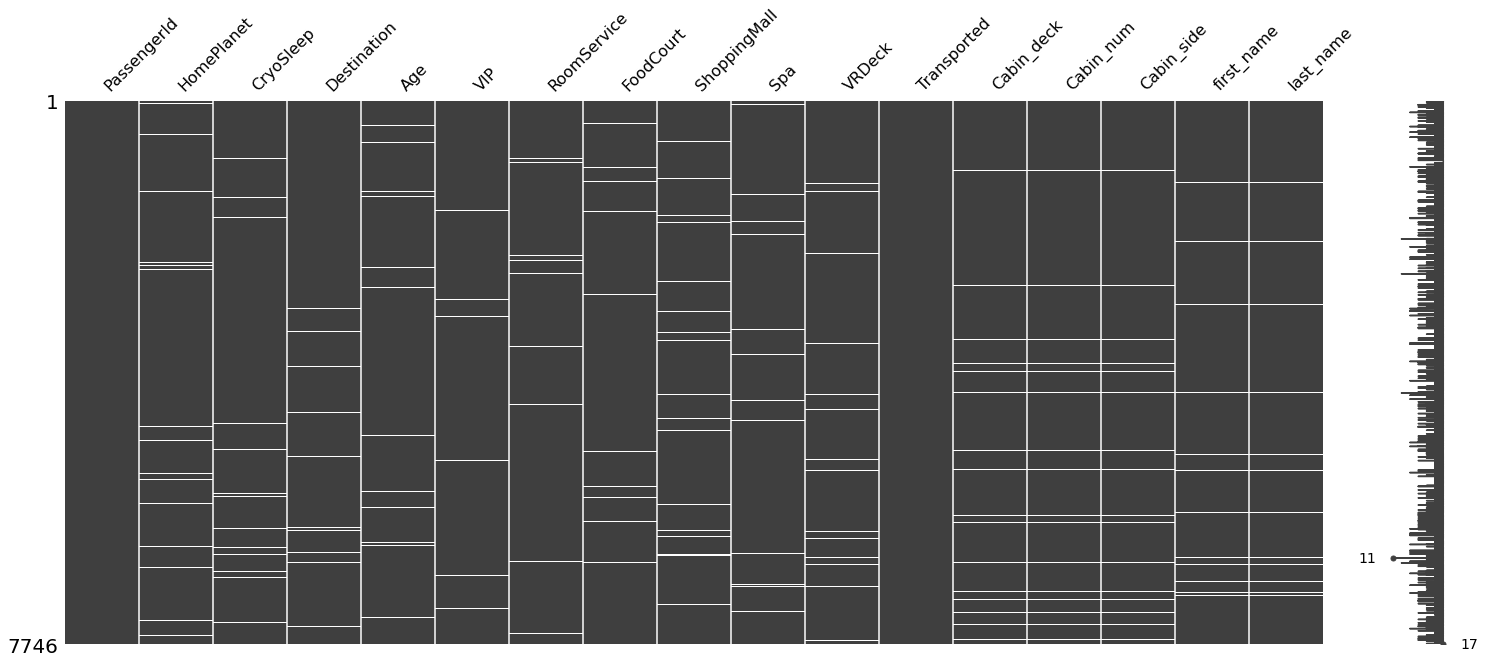

In [559]:
msno.matrix(df_train_clean)

In [560]:
df_train_clean.CryoSleep = pd.to_numeric(df_train_clean.CryoSleep)
df_train_clean.VIP = pd.to_numeric(df_train_clean.VIP)
df_train_clean.Cabin_num = pd.to_numeric(df_train_clean.Cabin_num)
df_train_clean[df_train_clean.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
33,5988,NaN,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,1022.0,P,Stanya,Schmondez
49,2544,NaN,1.0,TRAPPIST-1e,52.0,0.0,0.0,0.0,0.0,0.0,0.0,1,G,433.0,S,Royce,Douglasen
98,4374,NaN,1.0,TRAPPIST-1e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1,B,154.0,P,Rotan,Seflock
160,6030,NaN,0.0,TRAPPIST-1e,13.0,0.0,1144.0,0.0,6.0,0.0,0.0,0,F,1320.0,P,Karena,Prickmantes
166,6267,NaN,1.0,TRAPPIST-1e,64.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,Alasmon,Dischod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,8319,NaN,0.0,TRAPPIST-1e,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,1438.0,P,Rence,Monroellynn
7619,3370,NaN,0.0,TRAPPIST-1e,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0,G,594.0,P,Dawne,Tranklinay
7701,5689,NaN,0.0,TRAPPIST-1e,40.0,0.0,521.0,4.0,53.0,70.0,141.0,0,E,397.0,S,Lison,Mcdowns
7774,1267,NaN,0.0,TRAPPIST-1e,67.0,0.0,0.0,761.0,0.0,1.0,0.0,1,F,271.0,P,Karah,Horners


In [561]:
encoded = df_train_clean.copy(deep=True)

categorical_var=['HomePlanet',"Destination","Cabin_deck","Cabin_side"]
encoder = OneHotEncoder(sparse=False)
encoder.fit(encoded[categorical_var])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', nan], dtype=object)]

In [562]:
coded_cat = encoder.transform(encoded[categorical_var])
coded_cat

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [563]:
df_train_en = pd.DataFrame(coded_cat,index=encoded[categorical_var].index)
df_train_en.columns = list(encoder.get_feature_names_out())

In [564]:
df_train_en.columns

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_nan', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Destination_nan', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C',
       'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G',
       'Cabin_deck_T', 'Cabin_deck_nan', 'Cabin_side_P', 'Cabin_side_S',
       'Cabin_side_nan'],
      dtype='object')

In [565]:
for c in df_train_en.columns:
  if not c.endswith("nan"):
    c_nan = "_".join(c.split("_")[0:-1])  + "_nan"
    try:
      df_train_en[c] = np.where(df_train_en[c_nan] == 1, np.nan, df_train_en[c])
    except KeyError:
      continue

In [566]:
df_train_en = df_train_en.drop([x for x in df_train_en.columns if x.endswith("_nan")], axis=1)
df_train_en

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7820,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7821,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [567]:
numerical_var=[x for x in df_train_clean.columns if x not in categorical_var+['first_name','last_name',"PassengerId"]]
numerical_var

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_num']

In [568]:
df_train_encoded = df_train_en.join(df_train_clean[numerical_var])
df_train_encoded.columns

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabin_deck_A', 'Cabin_deck_B',
       'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
       'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_P', 'Cabin_side_S',
       'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num'],
      dtype='object')

Imputación de variables numéricas

In [569]:
scaler = MinMaxScaler()
df_train_imp = df_train_encoded.copy(deep=True)
df_train_imp = scaler.fit_transform(df_train_imp)
imputer = IterativeImputer(estimator=KNeighborsRegressor())
df_train_imp = imputer.fit_transform(df_train_imp)

df_train_imp = pd.DataFrame(df_train_imp, index=df_train_encoded.index, columns=df_train_encoded.columns)

df_train_imp = df_train_imp.join(df_train_clean[['first_name',"last_name"]])
df_train_imp

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,first_name,last_name
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.129440,0.000553,0.008702,0.722626,0.0,0.064976,Azhah,Tronsive
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.066561,Roswal,Sha
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.181194,Shaiam,Tinganking
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.009911,0.040519,0.000000,0.000000,0.038053,0.0,0.750132,Landa,Grifford
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.028520,0.000045,0.006342,0.0,0.004754,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.696778,Risps,Hacle
7819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.031670,0.002767,0.000560,0.0,0.242472,Gabrie,Reenez
7820,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.936080,Panzel,Ruity
7821,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.028176,0.005236,0.000000,0.003731,0.0,0.133650,Belly,Weavesend


In [570]:
df_train_imp[df_train_clean.HomePlanet.isna()]

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,first_name,last_name
33,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.539884,Stanya,Schmondez
49,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.228737,Royce,Douglasen
98,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.081352,Rotan,Seflock
160,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.079849,0.000000,0.000255,0.000000,0.000000,0.0,0.697306,Karena,Prickmantes
166,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.150026,Alasmon,Dischod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.759641,Rence,Monroellynn
7619,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.313788,Dawne,Tranklinay
7701,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.036365,0.000134,0.002256,0.003124,0.026301,0.0,0.209720,Lison,Mcdowns
7774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.025526,0.000000,0.000045,0.000000,1.0,0.143159,Karah,Horners


In [571]:
d=df_train_imp.HomePlanet_Earth+ df_train_imp.HomePlanet_Europa + df_train_imp.HomePlanet_Mars
d.describe()

count    7746.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

In [572]:
df_train_imp["HomePlanet"]=df_train_imp[["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_train_imp["Destination"]=df_train_imp[["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_train_imp["Cabin_deck"]=df_train_imp[['Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T']].idxmax(axis=1).str.split('_', expand=True)[2]
df_train_imp["Cabin_side"]=df_train_imp[['Cabin_side_P', 'Cabin_side_S']].idxmax(axis=1).str.split('_', expand=True)[2]

tirar = ["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]
tirar += ["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
tirar += ['Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T']
tirar += ['Cabin_side_P', 'Cabin_side_S']

df_train_imp = df_train_imp.drop(tirar, axis=1)
df_train_imp.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Cabin_num', 'first_name', 'last_name',
       'HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side'],
      dtype='object')

In [573]:
df = df_train_imp[[x for x in df_train_clean.columns if x != "PassengerId"]]
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
0,Europa,0.0,TRAPPIST-1e,0.721519,0.0,0.000000,0.129440,0.000553,0.008702,0.722626,0.0,C,0.064976,P,Azhah,Tronsive
1,Mars,1.0,TRAPPIST-1e,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.066561,S,Roswal,Sha
2,Europa,1.0,TRAPPIST-1e,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,B,0.181194,S,Shaiam,Tinganking
3,Earth,0.0,TRAPPIST-1e,0.544304,0.0,0.009911,0.040519,0.000000,0.000000,0.038053,0.0,F,0.750132,P,Landa,Grifford
4,Earth,0.0,TRAPPIST-1e,0.240506,0.0,0.000000,0.000000,0.028520,0.000045,0.006342,0.0,G,0.004754,P,Gracy,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,0.0,TRAPPIST-1e,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.696778,S,Risps,Hacle
7819,Earth,0.0,TRAPPIST-1e,0.556962,0.0,0.000000,0.000000,0.031670,0.002767,0.000560,0.0,G,0.242472,S,Gabrie,Reenez
7820,Mars,1.0,TRAPPIST-1e,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,F,0.936080,P,Panzel,Ruity
7821,Earth,0.0,TRAPPIST-1e,0.189873,0.0,0.000000,0.028176,0.005236,0.000000,0.003731,0.0,E,0.133650,P,Belly,Weavesend


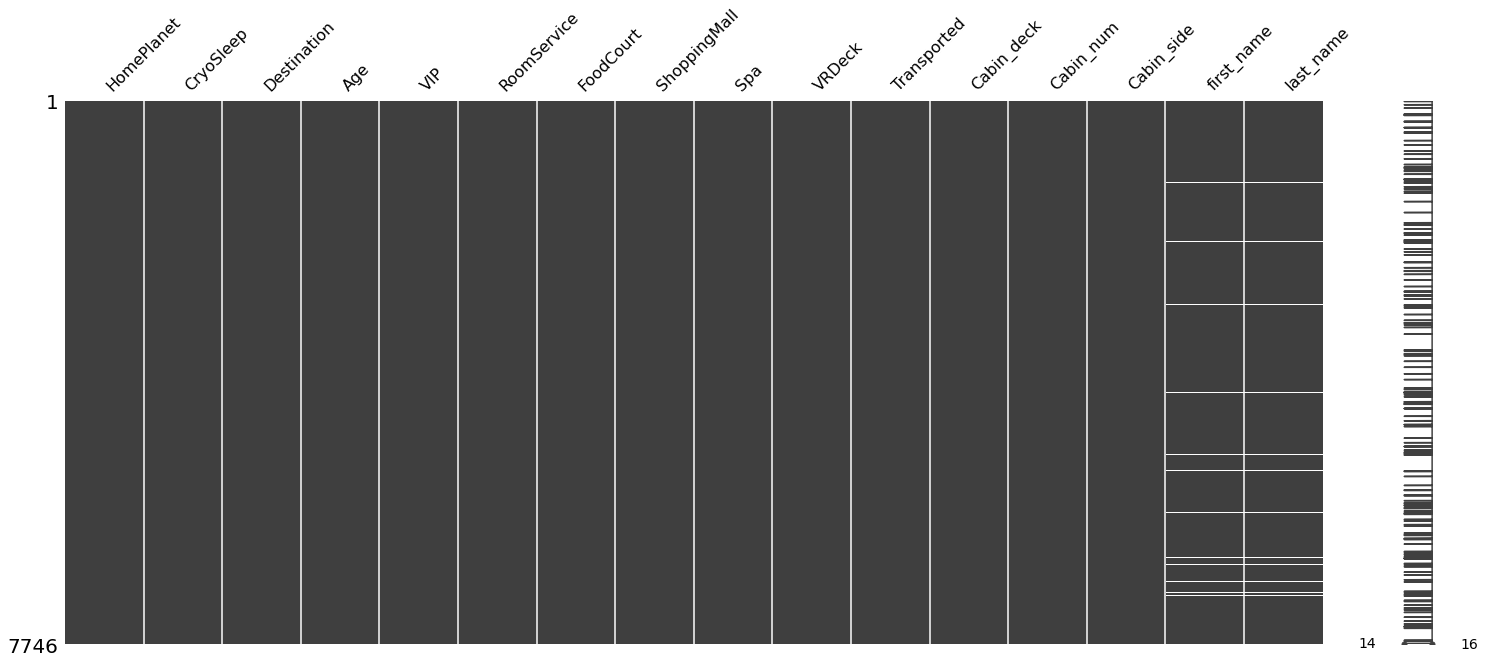

In [574]:
msno.matrix(df)

In [575]:
df.to_csv("df_train_imputed.csv")

##Modelos

In [576]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_deck', 'Cabin_num', 'Cabin_side', 'first_name', 'last_name'],
      dtype='object')

In [577]:
cols = ["HomePlanet", "Destination", "Cabin_deck", 'Cabin_side', 'first_name', 'last_name']

for col in cols:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])
df[cols] = scaler.fit_transform(df[cols])
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
0,0.5,0.0,1.0,0.721519,0.0,0.000000,0.129440,0.000553,0.008702,0.722626,0.0,0.285714,0.064976,0.0,0.113179,0.927783
1,1.0,1.0,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.066561,1.0,0.785796,0.825667
2,0.5,1.0,1.0,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.181194,1.0,0.821496,0.918123
3,0.0,0.0,1.0,0.544304,0.0,0.009911,0.040519,0.000000,0.000000,0.038053,0.0,0.714286,0.750132,0.0,0.553361,0.401104
4,0.0,0.0,1.0,0.240506,0.0,0.000000,0.000000,0.028520,0.000045,0.006342,0.0,0.857143,0.004754,0.0,0.414736,0.282429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.0,0.0,1.0,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.696778,1.0,0.777820,0.405704
7819,0.0,0.0,1.0,0.556962,0.0,0.000000,0.000000,0.031670,0.002767,0.000560,0.0,0.857143,0.242472,1.0,0.374858,0.758970
7820,1.0,1.0,1.0,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.714286,0.936080,0.0,0.706798,0.792088
7821,0.0,0.0,1.0,0.189873,0.0,0.000000,0.028176,0.005236,0.000000,0.003731,0.0,0.571429,0.133650,0.0,0.131409,0.968721


In [578]:
df_train = df.drop(["Transported"],axis=1)

#### Modelo 1: Algoritmo:  XGBOOST

In [579]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(df_train, df.Transported, test_size=0.20, random_state=42)

In [580]:
best_xg_reg=xgb.XGBClassifier(alpha=0.0001, colsample_bytree=1,
              learning_rate=0.4, max_depth=7,           
              n_estimators=5, objetive="binary:logistic")
best_xg_reg.fit(X_train, y_train)

XGBClassifier(alpha=0.0001, learning_rate=0.4, max_depth=7, n_estimators=5,
              objetive='binary:logistic')

In [581]:
y_train_pred_best= best_xg_reg.predict(X_train)
y_val_pred_best= best_xg_reg.predict(X_val)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred_best))

print("TESTEO")
print(classification_report(y_val, y_val_pred_best))

ENTRENAMIENTO
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3002
         1.0       0.87      0.86      0.87      3194

    accuracy                           0.86      6196
   macro avg       0.86      0.86      0.86      6196
weighted avg       0.86      0.86      0.86      6196

TESTEO
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       780
         1.0       0.79      0.81      0.80       770

    accuracy                           0.80      1550
   macro avg       0.80      0.80      0.80      1550
weighted avg       0.80      0.80      0.80      1550



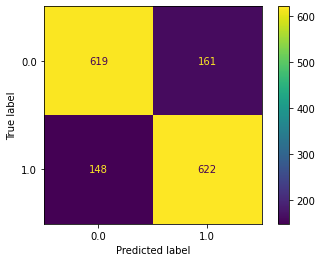

In [582]:
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_best)

#### Modelo 2: Algoritmo:  RandomForestClassifier
#### Preprocesado: Discretización de las features `Age`,  `AnnualIncome` y `FamilyMembers` 

In [583]:
best_RM=ensemble.RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=20,
                       random_state=42)
best_RM.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=20,
                       random_state=42)

In [584]:
y_train_pred_best= best_RM.predict(X_train)
y_val_pred_best= best_RM.predict(X_val)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred_best))

print("TESTEO")
print(classification_report(y_val, y_val_pred_best))

ENTRENAMIENTO
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      3002
         1.0       0.85      0.88      0.86      3194

    accuracy                           0.86      6196
   macro avg       0.86      0.86      0.86      6196
weighted avg       0.86      0.86      0.86      6196

TESTEO
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       780
         1.0       0.79      0.84      0.81       770

    accuracy                           0.81      1550
   macro avg       0.81      0.81      0.81      1550
weighted avg       0.81      0.81      0.81      1550



#### Modelo 3: Algoritmo:  SVM
#### Preprocesado: Discretización de las features `Age`,  `AnnualIncome` y `FamilyMembers` (utilizado en paso anterior) 

In [585]:
best_svm=sklearn.svm.SVC(C=1)
best_svm.fit(X_train, y_train)

SVC(C=1)

In [586]:
y_train_pred_best= best_svm.predict(X_train)
y_val_pred_best= best_svm.predict(X_val)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_train_pred_best))

print("TESTEO")
print(classification_report(y_val, y_val_pred_best))

ENTRENAMIENTO
              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78      3002
         1.0       0.83      0.69      0.75      3194

    accuracy                           0.77      6196
   macro avg       0.77      0.77      0.77      6196
weighted avg       0.78      0.77      0.76      6196

TESTEO
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       780
         1.0       0.82      0.69      0.75       770

    accuracy                           0.77      1550
   macro avg       0.78      0.77      0.77      1550
weighted avg       0.78      0.77      0.77      1550



# Curación y preparación de los datos de test

In [589]:
test_dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [590]:
df_test = test_dataset.copy()

In [591]:
# maneja bien los nulos y los nan
df_test[['Cabin_deck','Cabin_num', "Cabin_side"]]=df_test.Cabin.str.split('/',expand=True)

In [592]:
# todo valor en la columna name tiene un solo espacio
df_test[['first_name','last_name']]=df_test.Name.str.split(' ',expand=True)

In [593]:
df_test_NR = df_test.copy()
df_test_NR.drop('Cabin', inplace=True, axis=1)
df_test_NR.drop('Name', inplace=True, axis=1)

In [594]:
df_test_NR.columns

df_test_NR.CryoSleep = pd.to_numeric(df_test_NR.CryoSleep)
df_test_NR.VIP = pd.to_numeric(df_test_NR.VIP)
df_test_NR.Cabin_num = pd.to_numeric(df_test_NR.Cabin_num)
df_test_NR[df_test_NR.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
16,6591,NaN,0.0,TRAPPIST-1e,22.0,0.0,969.0,47.0,23.0,134.0,0.0,E,445.0,P,Weet,Flie
17,6054,NaN,0.0,TRAPPIST-1e,11.0,0.0,0.0,0.0,0.0,0.0,0.0,G,1032.0,P,Elene,Knoxonway
50,637,NaN,0.0,TRAPPIST-1e,28.0,0.0,NaN,0.0,7104.0,0.0,0.0,F,141.0,P,Cineys,Winie
83,1892,NaN,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G,322.0,S,Ellard,Kinson
173,7761,NaN,0.0,TRAPPIST-1e,45.0,0.0,0.0,1.0,233.0,453.0,17.0,F,1704.0,P,Iandy,Cooks
241,7155,NaN,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,847.0,1.0,G,1224.0,P,Dannie,Hebernandry
255,5081,NaN,1.0,TRAPPIST-1e,18.0,0.0,0.0,0.0,0.0,0.0,0.0,F,1118.0,P,Frohs,Stie
261,2281,NaN,1.0,PSO J318.5-22,16.0,0.0,0.0,0.0,0.0,0.0,0.0,G,395.0,S,Valey,Currisones
265,4154,NaN,0.0,TRAPPIST-1e,23.0,0.0,NaN,282.0,0.0,0.0,71.0,F,911.0,P,Aarone,Sweett
308,8325,NaN,0.0,55 Cancri e,17.0,0.0,0.0,0.0,615.0,0.0,0.0,G,1439.0,P,Erman,Russelloyd


In [595]:
encoded_t = df_test_NR.copy(deep=True)

categorical_cols=['HomePlanet',"Destination","Cabin_deck","Cabin_side"]
encoder = OneHotEncoder(sparse=False)
encoder.fit(encoded_t[categorical_cols])
# We can inspect the categories found by the encoder 
encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', nan], dtype=object)]

In [596]:
coded_cat_test = encoder.transform(encoded_t[categorical_cols])
coded_cat_test

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [597]:
df_test_coded = pd.DataFrame(coded_cat_test,index=encoded_t[categorical_cols].index)
df_test_coded.columns = list(encoder.get_feature_names_out())

In [598]:
for c in df_test_coded.columns:
  if not c.endswith("nan"):
    c_nan = "_".join(c.split("_")[0:-1])  + "_nan"
    try:
      df_test_coded[c] = np.where(df_test_coded[c_nan] == 1, np.nan, df_test_coded[c])
    except KeyError:
      continue

In [599]:
df_test_coded = df_test_coded.drop([x for x in df_test_coded.columns if x.endswith("_nan")], axis=1)
df_test_coded

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
866,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
868,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [600]:
numerical_cols=[x for x in df_test_NR.columns if x not in categorical_cols+['first_name','last_name','PassengerId']]
numerical_cols

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_num']

In [601]:
df_test_encoded = df_test_coded.join(df_test_NR[numerical_cols])
df_test_encoded

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,Cabin_side_S,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1489.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,0.0,22.0,1.0,0.0,864.0,0.0,776.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,63.0,0.0,0.0,0.0,80.0,0.0,2322.0,577.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,54.0,0.0,676.0,0.0,231.0,379.0,0.0,1212.0
866,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,947.0
867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1148.0
868,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,18.0,0.0,765.0,0.0,13.0,0.0,0.0,293.0


In [602]:
scaler = MinMaxScaler()
df_test_imp = df_test_encoded.copy(deep=True)
df_test_imp = scaler.fit_transform(df_test_imp)

imputer = IterativeImputer(estimator=KNeighborsRegressor())
df_test_imp = imputer.fit_transform(df_test_imp)

df_test_imp = pd.DataFrame(df_test_imp, index=df_test_encoded.index, columns=df_test_encoded.columns)

df_test_imp = df_test_imp.join(df_test_NR[['first_name',"last_name"]])

In [603]:
df_test_imp[df_test_NR.HomePlanet.isna()]

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,...,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,first_name,last_name
16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.297297,0.0,0.164572,0.002702,0.002539,0.008951,0.000000,0.234952,Weet,Flie
17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.148649,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.544879,Elene,Knoxonway
50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.378378,0.0,0.069124,0.000000,0.784279,0.000000,0.000000,0.074446,Cineys,Winie
83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.170011,Ellard,Kinson
173,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.608108,0.0,0.000000,0.000057,0.025723,0.030261,0.000982,0.899683,Iandy,Cooks
241,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.527027,0.0,0.000000,0.000000,0.000000,0.056580,0.000058,0.646251,Dannie,Hebernandry
255,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.590285,Frohs,Stie
261,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.216216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.208553,Valey,Currisones
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.310811,0.0,0.017289,0.016212,0.000000,0.000000,0.004103,0.480993,Aarone,Sweett
308,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229730,0.0,0.000000,0.000000,0.067896,0.000000,0.000000,0.759768,Erman,Russelloyd


In [604]:
df_test_imp["HomePlanet"]=df_test_imp[["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_test_imp["Destination"]=df_test_imp[["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]].idxmax(axis=1).str.split('_', expand=True)[1]
df_test_imp["Cabin_deck"]=df_test_imp[['Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T']].idxmax(axis=1).str.split('_', expand=True)[2]
df_test_imp["Cabin_side"]=df_test_imp[['Cabin_side_P', 'Cabin_side_S']].idxmax(axis=1).str.split('_', expand=True)[2]

tirar = ["HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars"]
tirar += ["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]
tirar += ['Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T']
tirar += ['Cabin_side_P', 'Cabin_side_S']

df_test_imp = df_test_imp.drop(tirar, axis=1)

In [605]:
df_test_ready = df_test_imp[[x for x in df_test_NR.columns if x != "PassengerId"]]

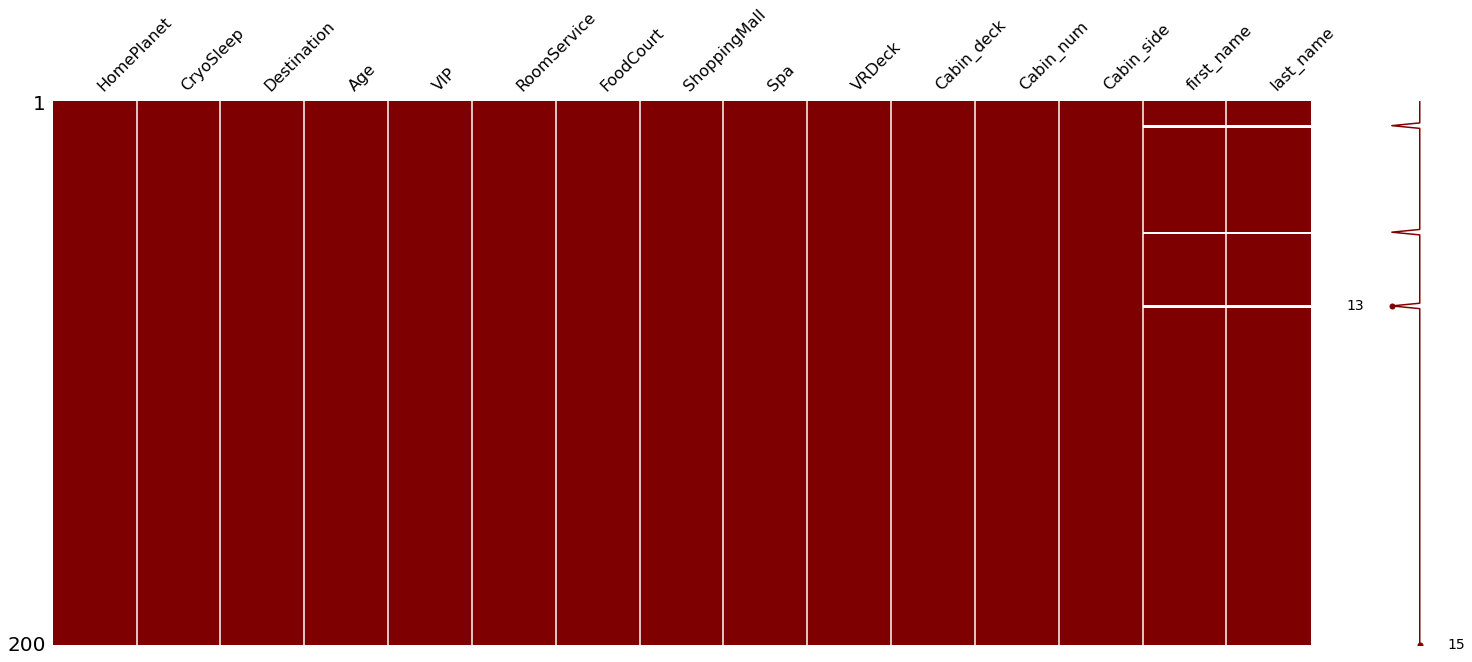

In [606]:
msno.matrix(df_test_ready.sample(200), color=[0.5,0,0])

In [607]:
label_cols = ["HomePlanet", "Destination", "Cabin_deck", 'Cabin_side', 'first_name', 'last_name']

for col in label_cols:
    df_test_ready[col] = df_test_ready[col].astype(str)
    df_test_ready[col] = LabelEncoder().fit_transform(df_test_ready[col])
df_test_ready[label_cols] = scaler.fit_transform(df_test_ready[label_cols])
df_test_ready

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name
0,0.5,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.114678,1.0,0.679783,0.883453
1,0.0,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.786167,1.0,0.214383,0.323741
2,0.0,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000,0.857143,0.409715,0.0,0.327001,0.579856
3,0.0,0.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173,0.571429,0.304646,1.0,0.563094,0.374101
4,0.5,0.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.061774,1.0,0.081411,0.794245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000,0.714286,0.639916,1.0,0.055631,0.673381
866,0.0,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.500000,1.0,0.488467,0.421583
867,0.0,1.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.606125,0.0,0.461330,0.493525
868,0.0,0.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000,0.714286,0.154699,1.0,0.476255,0.630216


Luego de haber analizado los resultados de los modelos aplicados, decidimos seguir adelante con el modelo de XGBoost con los valores de hiperparametros por defecto.

In [608]:
X_train_test = df_test_ready

In [609]:
predictions_test = best_xg_reg.predict(X_train_test)

In [610]:
predictions_test

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1.

In [611]:
df_test_ready["Transported"] = predictions_test
df_test_ready

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_num,Cabin_side,first_name,last_name,Transported
0,0.5,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.114678,1.0,0.679783,0.883453,1.0
1,0.0,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.786167,1.0,0.214383,0.323741,1.0
2,0.0,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000,0.857143,0.409715,0.0,0.327001,0.579856,0.0
3,0.0,0.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173,0.571429,0.304646,1.0,0.563094,0.374101,0.0
4,0.5,0.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.061774,1.0,0.081411,0.794245,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000,0.714286,0.639916,1.0,0.055631,0.673381,0.0
866,0.0,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.500000,1.0,0.488467,0.421583,1.0
867,0.0,1.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.606125,0.0,0.461330,0.493525,1.0
868,0.0,0.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000,0.714286,0.154699,1.0,0.476255,0.630216,0.0


In [612]:
df_test_ready["PassengerId"] = df_test_NR.PassengerId

In [613]:
df_test_ready.PassengerId = df_test_ready.PassengerId.astype(int)
df_test_ready.Transported = df_test_ready.Transported.astype(int)
df_test_ready[["PassengerId","Transported"]]

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


Generamos la salida para subir a Kaggle.

In [614]:
df_test_ready[["PassengerId","Transported"]].to_csv("submission_grupo17.csv", header=True, index=False)

Conclusión:
Luego de haber procesado los datos y aplicado los modelos, utilizamos la metrica F1-Score para evaluar los resultados ya que entendemos que es la métrica que más se adapta dada la naturaleza de los datos de origen, considerando que no podemos determinar que costo tiene un falso negativo y un falso positivo en nuestro dataset. Otra metrica a considerar puede ser recall debido a que nos da un parametro de la sensibilidad del modelo y muestra realcion entre verdaderos positivos y todos los positivos. El modelo seleccionado fué XGBOOST con 0.80 de accuracy en test.